In [1]:
import numpy as np
from ensembles import RandomForestMSE, GradientBoostingMSE
import pandas as pd
import datetime
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error as mse
from matplotlib import pyplot as plt
from matplotlib import rc

rc('font',**{'family':'serif','serif':['Palatino']})
plt.rcParams['pdf.fonttype'] = 42

## Задание 1

In [2]:
train_data = pd.read_csv('train_data.csv', index_col='index')
train_target = pd.read_csv('train_target.csv', index_col='index')

In [3]:
train_data

,id,date,bedrooms_number,batchrooms_number,square_footage_home,square_footage_lot,floors_number,has_waterfront,has_been_viewed,condition_quality,housing_unity_grade,square_footage_except_basement,square_footage_only_basement,build_year,renovation_year,coordinate_latitude,coordinate_longitude,square_footage_home_old,square_footage_lot_old
index,,,,,,,,,,,,,,,,,,,
0,16530,2014-05-02,2,2.00,1350,2560,1.0,0,0,3,8,1350,0,1976,0,200.6344,4.893,1790,2560
1,3651,2014-05-02,3,1.75,1800,23103,1.0,0,0,3,7,1800,0,1968,0,200.6517,5.094,1410,18163
2,13568,2014-05-02,3,1.75,2240,10578,2.0,0,0,5,8,1550,690,1923,0,200.6954,4.708,1570,10578
3,20352,2014-05-02,4,2.00,1820,5000,1.5,0,1,3,7,1640,180,1945,0,200.6815,4.731,2060,5000
4,10524,2014-05-02,4,1.75,1560,8700,1.0,0,0,4,7,1560,0,1967,0,200.7274,4.819,2080,8000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
17275,7718,2015-03-10,4,2.50,1921,4888,2.0,0,0,3,7,1921,0,2009,0,200.2689,4.760,1921,9140
17276,4556,2015-03-10,3,2.50,1890,11036,1.0,0,0,3,8,1460,430,1973,0,200.7426,4.646,2040,7524
17277,11634,2015-03-10,3,1.00,1380,10112,1.0,0,0,4,7,940,440,1963,0,200.3196,4.649,1240,10112


In [4]:
train_target

,price
index,
0,340.000
1,289.000
2,755.000
3,655.000
4,387.500
...,...
17275,250.000
17276,446.000
17277,235.000


In [5]:
train_data.id.nunique()

17193

In [6]:
train_data.isna().any()

id                                False
date                              False
bedrooms_number                   False
batchrooms_number                 False
square_footage_home               False
square_footage_lot                False
floors_number                     False
has_waterfront                    False
has_been_viewed                   False
condition_quality                 False
housing_unity_grade               False
square_footage_except_basement    False
square_footage_only_basement      False
build_year                        False
renovation_year                   False
coordinate_latitude               False
coordinate_longitude              False
square_footage_home_old           False
square_footage_lot_old            False
dtype: bool

In [7]:
train_data.date[0]

'2014-05-02'

In [8]:
train_data.date = list(map(lambda x: datetime.date(int(x[0:4]), int(x[5:7]), int(x[8:])).toordinal(), train_data.date))

In [9]:
train_data

,id,date,bedrooms_number,batchrooms_number,square_footage_home,square_footage_lot,floors_number,has_waterfront,has_been_viewed,condition_quality,housing_unity_grade,square_footage_except_basement,square_footage_only_basement,build_year,renovation_year,coordinate_latitude,coordinate_longitude,square_footage_home_old,square_footage_lot_old
index,,,,,,,,,,,,,,,,,,,
0,16530,735355,2,2.00,1350,2560,1.0,0,0,3,8,1350,0,1976,0,200.6344,4.893,1790,2560
1,3651,735355,3,1.75,1800,23103,1.0,0,0,3,7,1800,0,1968,0,200.6517,5.094,1410,18163
2,13568,735355,3,1.75,2240,10578,2.0,0,0,5,8,1550,690,1923,0,200.6954,4.708,1570,10578
3,20352,735355,4,2.00,1820,5000,1.5,0,1,3,7,1640,180,1945,0,200.6815,4.731,2060,5000
4,10524,735355,4,1.75,1560,8700,1.0,0,0,4,7,1560,0,1967,0,200.7274,4.819,2080,8000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
17275,7718,735667,4,2.50,1921,4888,2.0,0,0,3,7,1921,0,2009,0,200.2689,4.760,1921,9140
17276,4556,735667,3,2.50,1890,11036,1.0,0,0,3,8,1460,430,1973,0,200.7426,4.646,2040,7524
17277,11634,735667,3,1.00,1380,10112,1.0,0,0,4,7,940,440,1963,0,200.3196,4.649,1240,10112


In [10]:
train_data.date

index
0        735355
1        735355
2        735355
3        735355
4        735355
          ...  
17275    735667
17276    735667
17277    735667
17278    735667
17279    735667
Name: date, Length: 17280, dtype: int64

In [11]:
train_data.dtypes

id                                  int64
date                                int64
bedrooms_number                     int64
batchrooms_number                 float64
square_footage_home                 int64
square_footage_lot                  int64
floors_number                     float64
has_waterfront                      int64
has_been_viewed                     int64
condition_quality                   int64
housing_unity_grade                 int64
square_footage_except_basement      int64
square_footage_only_basement        int64
build_year                          int64
renovation_year                     int64
coordinate_latitude               float64
coordinate_longitude              float64
square_footage_home_old             int64
square_footage_lot_old              int64
dtype: object

In [12]:
train_target.dtypes

price    float64
dtype: object

In [22]:
train_target.isna().any()

price    False
dtype: bool

In [13]:
X_train, X_test, y_train, y_test = train_test_split(train_data, train_target, test_size=0.3, random_state=1080)

In [14]:
X_train

,id,date,bedrooms_number,batchrooms_number,square_footage_home,square_footage_lot,floors_number,has_waterfront,has_been_viewed,condition_quality,housing_unity_grade,square_footage_except_basement,square_footage_only_basement,build_year,renovation_year,coordinate_latitude,coordinate_longitude,square_footage_home_old,square_footage_lot_old
index,,,,,,,,,,,,,,,,,,,
3837,8570,735411,1,1.50,1170,1456,2.0,0,0,3,8,1070,100,2007,0,200.5493,4.628,1360,1730
17062,14739,735661,3,1.75,1720,9775,1.0,0,0,3,8,1720,0,1978,0,200.3731,4.714,1970,8400
5257,14216,735432,3,1.75,1620,8085,1.0,0,0,3,7,1210,410,1976,0,200.7349,4.803,1700,8085
3818,1961,735411,3,3.25,2310,3075,2.0,0,0,3,8,1730,580,2005,0,200.5644,4.617,2310,3075
9731,10065,735504,4,2.75,2810,5046,2.0,0,0,3,9,2810,0,2014,0,200.3559,4.978,3060,4934
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9357,17305,735499,3,2.50,1700,6396,2.0,0,0,3,7,1700,0,2003,0,200.5333,5.130,1700,4444
11727,11592,735537,5,3.25,3540,5971,1.0,0,2,3,10,2000,1540,2005,0,200.6643,4.798,2820,6029
10412,5329,735515,1,1.00,730,5005,1.0,0,0,4,5,730,0,1945,0,200.6992,4.636,1630,5667


In [15]:
X_train.to_csv('X_train.csv')
X_test.to_csv('X_test.csv')
y_train.to_csv('y_train.csv')
y_test.to_csv('y_test.csv')

In [29]:
X_train, X_test, y_train, y_test = X_train.values, X_test.values, y_train.values.ravel(), y_test.values.ravel()

In [30]:
X_train

array([[8.57000e+03, 7.35411e+05, 1.00000e+00, ..., 4.62800e+00,
        1.36000e+03, 1.73000e+03],
       [1.47390e+04, 7.35661e+05, 3.00000e+00, ..., 4.71400e+00,
        1.97000e+03, 8.40000e+03],
       [1.42160e+04, 7.35432e+05, 3.00000e+00, ..., 4.80300e+00,
        1.70000e+03, 8.08500e+03],
       ...,
       [5.32900e+03, 7.35515e+05, 1.00000e+00, ..., 4.63600e+00,
        1.63000e+03, 5.66700e+03],
       [1.63950e+04, 7.35512e+05, 3.00000e+00, ..., 4.95900e+00,
        2.94000e+03, 1.21500e+04],
       [1.01050e+04, 7.35414e+05, 4.00000e+00, ..., 4.73500e+00,
        1.93000e+03, 2.88000e+04]])

## Задание 2

In [35]:
rf = RandomForestMSE(n_estimators=100, max_depth=None, feature_subsample_size=6, min_samples_split=2, 
                     min_samples_leaf=1, max_leaf_nodes=None)

In [36]:
%%time

rf.fit(X_train, y_train)

Wall time: 3.53 s


In [38]:
mse(y_test, rf.predict(X_test), squared=False)

130.9005117039358

In [40]:
y_train.mean()

540.5943114252644

In [43]:
y_train.std()

363.7444792039821

In [44]:
mse(y_test, np.full(y_test.shape, 540.59), squared=False)

374.2911256048548

In [102]:
n_estimators_list = [x for x in range(50, 650, 50)]
res_rmse_list = []
res_time_list = []
for n_estimators in n_estimators_list:
    rf = RandomForestMSE(n_estimators=n_estimators, max_depth=None, feature_subsample_size=6, min_samples_split=2, 
                         min_samples_leaf=1, max_leaf_nodes=None)
    res_time = %timeit -n1 -r1 -o rf.fit(X_train, y_train)
    res_time_list.append(res_time.average)
    res_rmse_list.append(mse(y_test, rf.predict(X_test), squared=False))

1.78 s ± 0 ns per loop (mean ± std. dev. of 1 run, 1 loop each)
3.58 s ± 0 ns per loop (mean ± std. dev. of 1 run, 1 loop each)
5.34 s ± 0 ns per loop (mean ± std. dev. of 1 run, 1 loop each)
7.2 s ± 0 ns per loop (mean ± std. dev. of 1 run, 1 loop each)
8.9 s ± 0 ns per loop (mean ± std. dev. of 1 run, 1 loop each)
10.7 s ± 0 ns per loop (mean ± std. dev. of 1 run, 1 loop each)
12.4 s ± 0 ns per loop (mean ± std. dev. of 1 run, 1 loop each)
14.3 s ± 0 ns per loop (mean ± std. dev. of 1 run, 1 loop each)
16 s ± 0 ns per loop (mean ± std. dev. of 1 run, 1 loop each)
17.8 s ± 0 ns per loop (mean ± std. dev. of 1 run, 1 loop each)
19.6 s ± 0 ns per loop (mean ± std. dev. of 1 run, 1 loop each)
21.4 s ± 0 ns per loop (mean ± std. dev. of 1 run, 1 loop each)


findfont: Font family ['serif'] not found. Falling back to DejaVu Sans.
findfont: Font family ['serif'] not found. Falling back to DejaVu Sans.
findfont: Font family ['serif'] not found. Falling back to DejaVu Sans.
findfont: Font family ['serif'] not found. Falling back to DejaVu Sans.


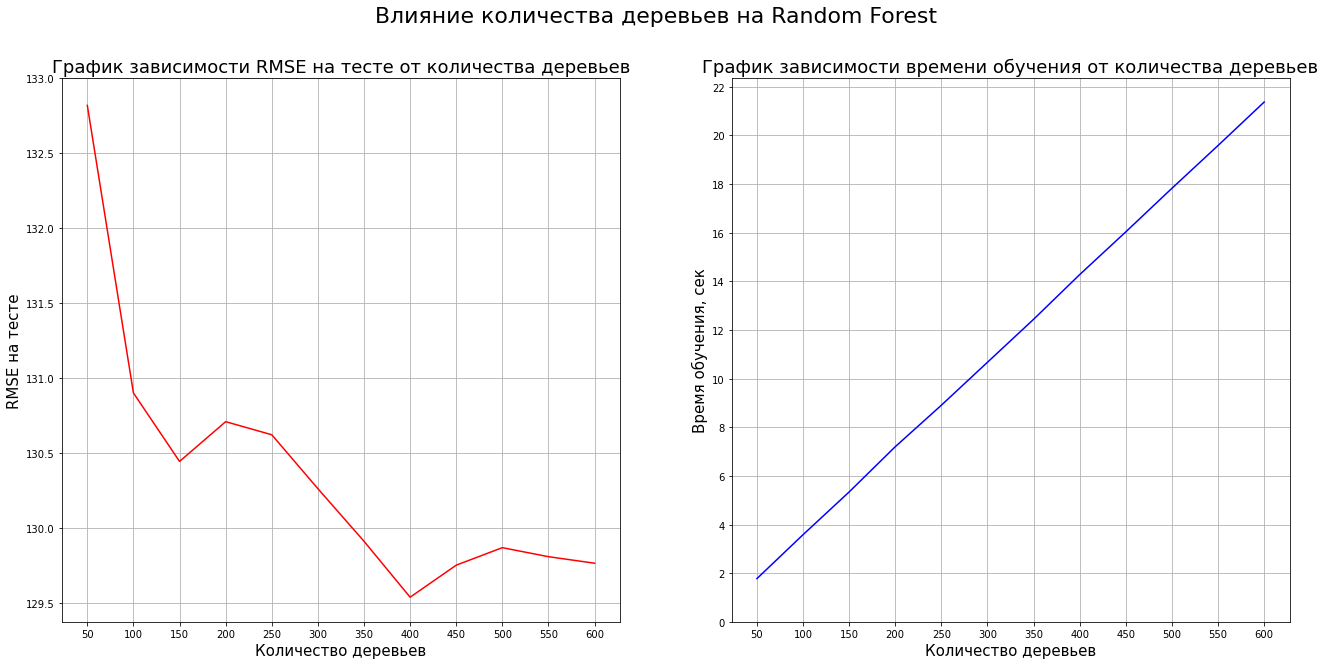

In [103]:
fig, axs = plt.subplots(1, 2, figsize=(22, 10))
plt.suptitle('Влияние количества деревьев на Random Forest', fontsize=22)
plt.subplot(121)
plt.plot(n_estimators_list, res_rmse_list, color='r')
plt.title('График зависимости RMSE на тесте от количества деревьев', fontsize=18)
plt.xlabel('Количество деревьев', fontsize=15)
plt.ylabel('RMSE на тесте', fontsize=15)
plt.xticks(np.arange(50, 650, 50))
plt.yticks(np.arange(129.5, 133.5, 0.5))
plt.grid()
plt.subplot(122)
plt.plot(n_estimators_list, res_time_list, color='b')
plt.title('График зависимости времени обучения от количества деревьев', fontsize=18)
plt.xlabel('Количество деревьев', fontsize=15)
plt.ylabel('Время обучения, сек', fontsize=15)
plt.xticks(np.arange(50, 650, 50))
plt.yticks(np.arange(0, 23, 2))
plt.grid()
fig.savefig('report/pictures/fig1.pdf', dpi=600)
plt.show()

In [104]:
max_features = [x for x in range(1, 20)]
res_rmse_list = []
res_time_list = []
for mf in max_features:
    rf = RandomForestMSE(n_estimators=400, max_depth=None, feature_subsample_size=mf, min_samples_split=2, 
                         min_samples_leaf=1, max_leaf_nodes=None)
    res_time = %timeit -n1 -r1 -o rf.fit(X_train, y_train)
    res_time_list.append(res_time.average)
    res_rmse_list.append(mse(y_test, rf.predict(X_test), squared=False))

4.8 s ± 0 ns per loop (mean ± std. dev. of 1 run, 1 loop each)
6.56 s ± 0 ns per loop (mean ± std. dev. of 1 run, 1 loop each)
8.49 s ± 0 ns per loop (mean ± std. dev. of 1 run, 1 loop each)
10.4 s ± 0 ns per loop (mean ± std. dev. of 1 run, 1 loop each)
12.3 s ± 0 ns per loop (mean ± std. dev. of 1 run, 1 loop each)
14.3 s ± 0 ns per loop (mean ± std. dev. of 1 run, 1 loop each)
16.1 s ± 0 ns per loop (mean ± std. dev. of 1 run, 1 loop each)
18.1 s ± 0 ns per loop (mean ± std. dev. of 1 run, 1 loop each)
20 s ± 0 ns per loop (mean ± std. dev. of 1 run, 1 loop each)
21.8 s ± 0 ns per loop (mean ± std. dev. of 1 run, 1 loop each)
23.9 s ± 0 ns per loop (mean ± std. dev. of 1 run, 1 loop each)
25.6 s ± 0 ns per loop (mean ± std. dev. of 1 run, 1 loop each)
27.7 s ± 0 ns per loop (mean ± std. dev. of 1 run, 1 loop each)
29.3 s ± 0 ns per loop (mean ± std. dev. of 1 run, 1 loop each)
31.2 s ± 0 ns per loop (mean ± std. dev. of 1 run, 1 loop each)
33.1 s ± 0 ns per loop (mean ± std. dev. of

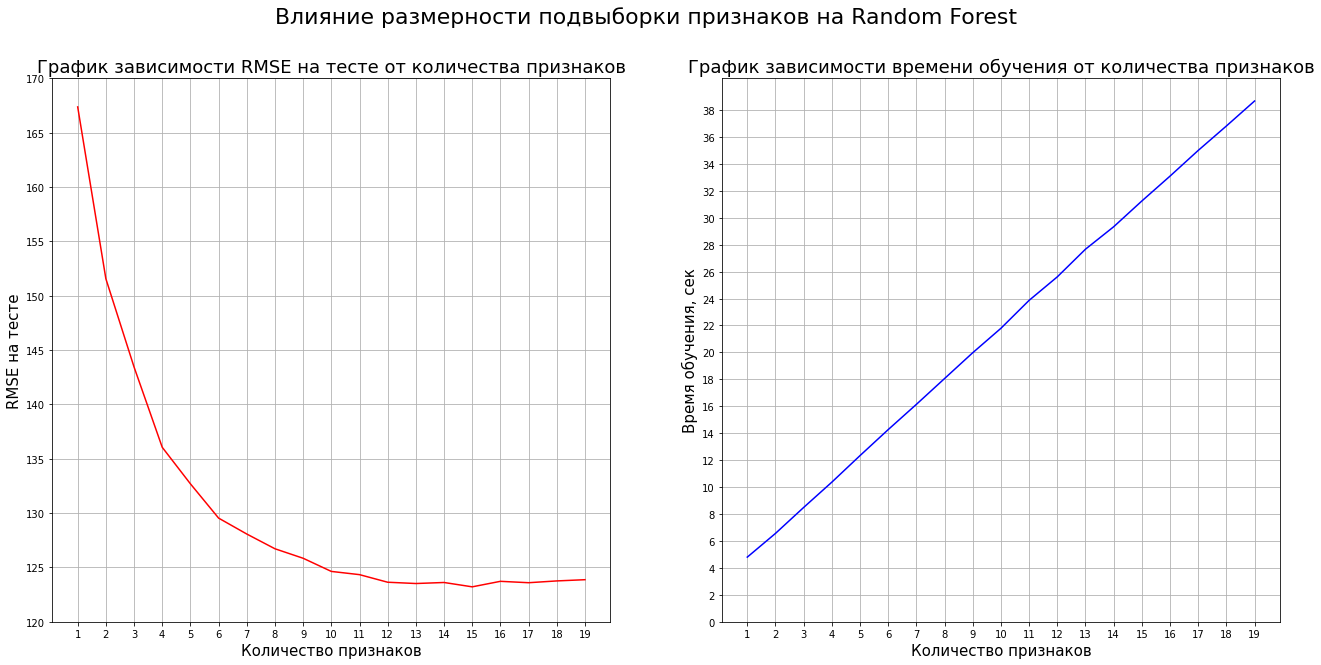

In [105]:
fig, axs = plt.subplots(1, 2, figsize=(22, 10))
plt.suptitle('Влияние размерности подвыборки признаков на Random Forest', fontsize=22)
plt.subplot(121)
plt.plot(max_features, res_rmse_list, color='r')
plt.title('График зависимости RMSE на тесте от количества признаков', fontsize=18)
plt.xlabel('Количество признаков', fontsize=15)
plt.ylabel('RMSE на тесте', fontsize=15)
plt.xticks(np.arange(1, 20))
plt.yticks(np.arange(120, 175, 5))
plt.grid()
plt.subplot(122)
plt.plot(max_features, res_time_list, color='b')
plt.title('График зависимости времени обучения от количества признаков', fontsize=18)
plt.xlabel('Количество признаков', fontsize=15)
plt.ylabel('Время обучения, сек', fontsize=15)
plt.xticks(np.arange(1, 20))
plt.yticks(np.arange(0, 40, 2))
plt.grid()
fig.savefig('report/pictures/fig2.pdf', dpi=600)
plt.show()

In [106]:
max_depth_list = [x for x in range(1, 11)]
max_depth_list.append(None)
res_rmse_list = []
res_time_list = []
for md in max_depth_list:
    rf = RandomForestMSE(n_estimators=400, max_depth=md, feature_subsample_size=12, min_samples_split=2, 
                         min_samples_leaf=1, max_leaf_nodes=None)
    res_time = %timeit -n1 -r1 -o rf.fit(X_train, y_train)
    res_time_list.append(res_time.average)
    res_rmse_list.append(mse(y_test, rf.predict(X_test), squared=False))

2.12 s ± 0 ns per loop (mean ± std. dev. of 1 run, 1 loop each)
3.71 s ± 0 ns per loop (mean ± std. dev. of 1 run, 1 loop each)
5.27 s ± 0 ns per loop (mean ± std. dev. of 1 run, 1 loop each)
6.82 s ± 0 ns per loop (mean ± std. dev. of 1 run, 1 loop each)
8.4 s ± 0 ns per loop (mean ± std. dev. of 1 run, 1 loop each)
9.87 s ± 0 ns per loop (mean ± std. dev. of 1 run, 1 loop each)
11.3 s ± 0 ns per loop (mean ± std. dev. of 1 run, 1 loop each)
12.7 s ± 0 ns per loop (mean ± std. dev. of 1 run, 1 loop each)
14.1 s ± 0 ns per loop (mean ± std. dev. of 1 run, 1 loop each)
15.4 s ± 0 ns per loop (mean ± std. dev. of 1 run, 1 loop each)
25.5 s ± 0 ns per loop (mean ± std. dev. of 1 run, 1 loop each)


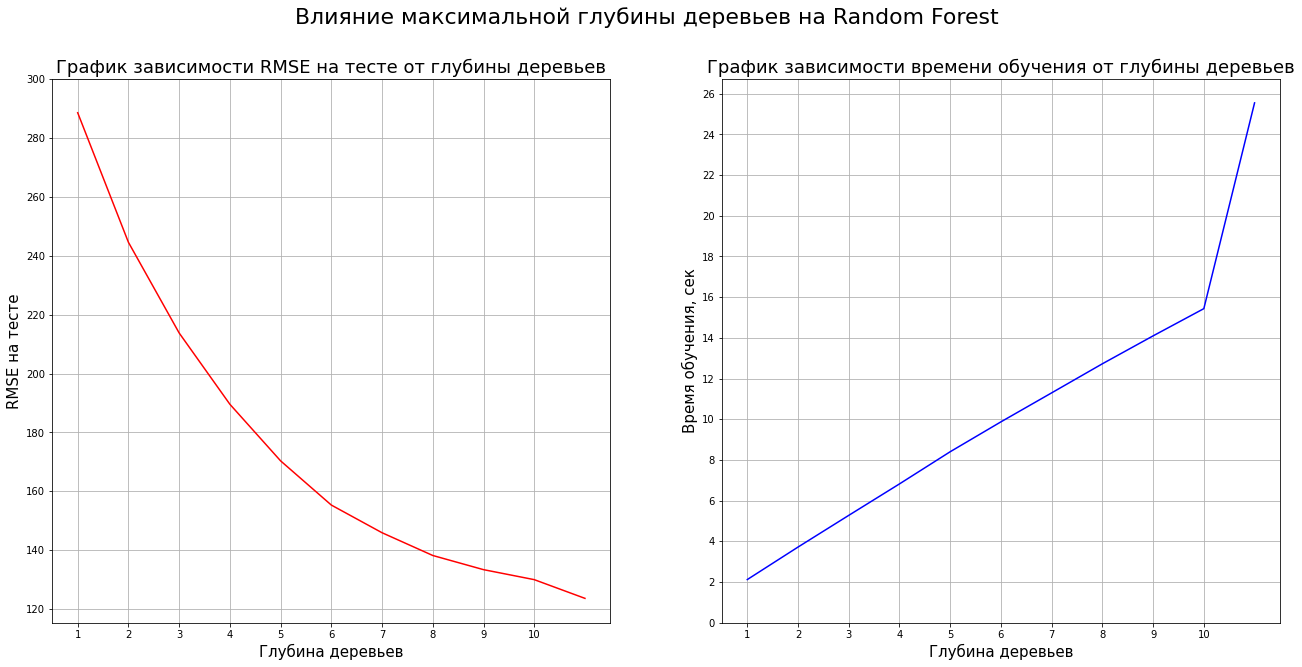

In [107]:
max_depth_list[-1] = 11
fig, axs = plt.subplots(1, 2, figsize=(22, 10))
plt.suptitle('Влияние максимальной глубины деревьев на Random Forest', fontsize=22)
plt.subplot(121)
plt.plot(max_depth_list, res_rmse_list, color='r')
plt.title('График зависимости RMSE на тесте от глубины деревьев', fontsize=18)
plt.xlabel('Глубина деревьев', fontsize=15)
plt.ylabel('RMSE на тесте', fontsize=15)
plt.xticks(max_depth_list[0:-1])
plt.yticks(np.arange(120, 320, 20))
plt.grid()
plt.subplot(122)
plt.plot(max_depth_list, res_time_list, color='b')
plt.title('График зависимости времени обучения от глубины деревьев', fontsize=18)
plt.xlabel('Глубина деревьев', fontsize=15)
plt.ylabel('Время обучения, сек', fontsize=15)
plt.xticks(max_depth_list[0:-1])
plt.yticks(np.arange(0, 28, 2))
plt.grid()
fig.savefig('report/pictures/fig3.pdf', dpi=600)
plt.show()

## Задание 3

In [108]:
n_estimators_list = [x for x in range(50, 650, 50)]
res_rmse_list = []
res_time_list = []
for n_estimators in n_estimators_list:
    gbm = GradientBoostingMSE(n_estimators=n_estimators, learning_rate=0.1, max_depth=5, feature_subsample_size=6, 
                              min_samples_split=2, min_samples_leaf=1, max_leaf_nodes=None)
    res_time = %timeit -n1 -r1 -o gbm.fit(X_train, y_train)
    res_time_list.append(res_time.average)
    res_rmse_list.append(mse(y_test, gbm.predict(X_test), squared=False))

614 ms ± 0 ns per loop (mean ± std. dev. of 1 run, 1 loop each)
1.25 s ± 0 ns per loop (mean ± std. dev. of 1 run, 1 loop each)
1.85 s ± 0 ns per loop (mean ± std. dev. of 1 run, 1 loop each)
2.47 s ± 0 ns per loop (mean ± std. dev. of 1 run, 1 loop each)
3.06 s ± 0 ns per loop (mean ± std. dev. of 1 run, 1 loop each)
3.71 s ± 0 ns per loop (mean ± std. dev. of 1 run, 1 loop each)
4.28 s ± 0 ns per loop (mean ± std. dev. of 1 run, 1 loop each)
4.91 s ± 0 ns per loop (mean ± std. dev. of 1 run, 1 loop each)
5.56 s ± 0 ns per loop (mean ± std. dev. of 1 run, 1 loop each)
6.17 s ± 0 ns per loop (mean ± std. dev. of 1 run, 1 loop each)
6.82 s ± 0 ns per loop (mean ± std. dev. of 1 run, 1 loop each)
7.39 s ± 0 ns per loop (mean ± std. dev. of 1 run, 1 loop each)


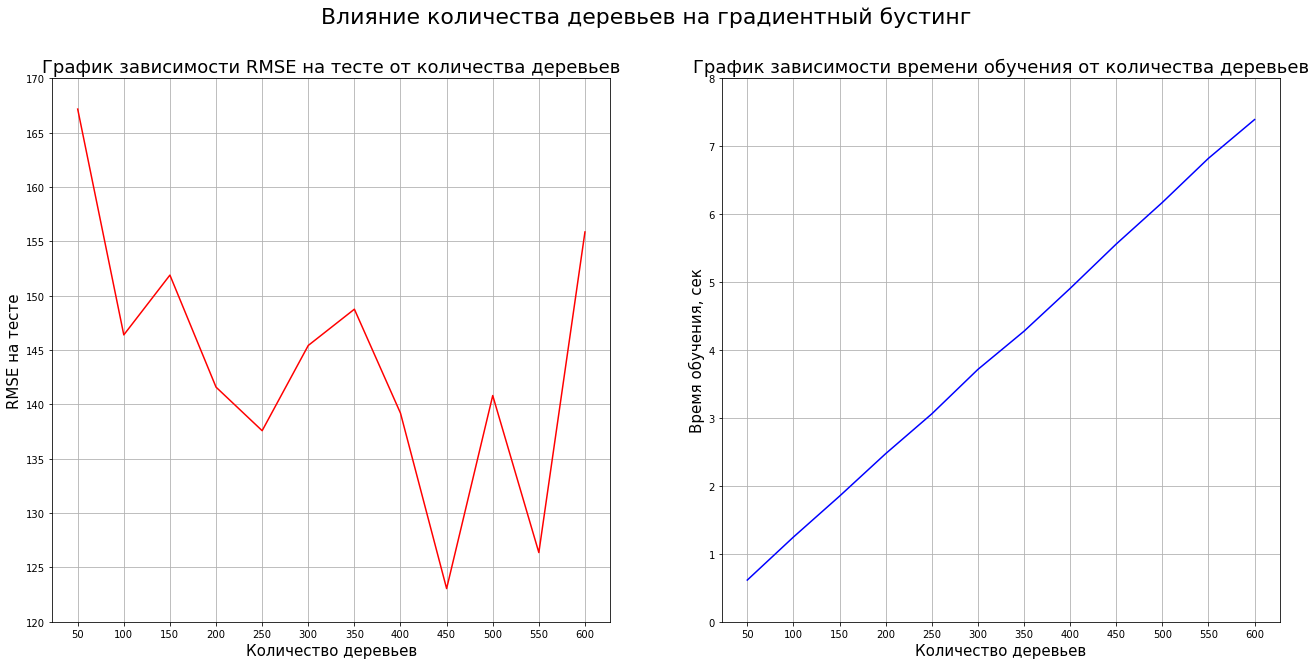

In [109]:
fig, axs = plt.subplots(1, 2, figsize=(22, 10))
plt.suptitle('Влияние количества деревьев на градиентный бустинг', fontsize=22)
plt.subplot(121)
plt.plot(n_estimators_list, res_rmse_list, color='r')
plt.title('График зависимости RMSE на тесте от количества деревьев', fontsize=18)
plt.xlabel('Количество деревьев', fontsize=15)
plt.ylabel('RMSE на тесте', fontsize=15)
plt.xticks(np.arange(50, 650, 50))
plt.yticks(np.arange(120, 175, 5))
plt.grid()
plt.subplot(122)
plt.plot(n_estimators_list, res_time_list, color='b')
plt.title('График зависимости времени обучения от количества деревьев', fontsize=18)
plt.xlabel('Количество деревьев', fontsize=15)
plt.ylabel('Время обучения, сек', fontsize=15)
plt.xticks(np.arange(50, 650, 50))
plt.yticks(np.arange(0, 9))
plt.grid()
fig.savefig('report/pictures/fig4.pdf', dpi=600)
plt.show()

In [110]:
max_features = [x for x in range(1, 20)]
res_rmse_list = []
res_time_list = []
for mf in max_features:
    gbm = GradientBoostingMSE(n_estimators=450, learning_rate=0.1, max_depth=5, feature_subsample_size=mf, 
                              min_samples_split=2, min_samples_leaf=1, max_leaf_nodes=None)
    res_time = %timeit -n1 -r1 -o gbm.fit(X_train, y_train)
    res_time_list.append(res_time.average)
    res_rmse_list.append(mse(y_test, gbm.predict(X_test), squared=False))

1.74 s ± 0 ns per loop (mean ± std. dev. of 1 run, 1 loop each)
2.49 s ± 0 ns per loop (mean ± std. dev. of 1 run, 1 loop each)
3.26 s ± 0 ns per loop (mean ± std. dev. of 1 run, 1 loop each)
4.05 s ± 0 ns per loop (mean ± std. dev. of 1 run, 1 loop each)
4.76 s ± 0 ns per loop (mean ± std. dev. of 1 run, 1 loop each)
5.55 s ± 0 ns per loop (mean ± std. dev. of 1 run, 1 loop each)
6.28 s ± 0 ns per loop (mean ± std. dev. of 1 run, 1 loop each)
7.01 s ± 0 ns per loop (mean ± std. dev. of 1 run, 1 loop each)
7.82 s ± 0 ns per loop (mean ± std. dev. of 1 run, 1 loop each)
8.55 s ± 0 ns per loop (mean ± std. dev. of 1 run, 1 loop each)
9.28 s ± 0 ns per loop (mean ± std. dev. of 1 run, 1 loop each)
10.1 s ± 0 ns per loop (mean ± std. dev. of 1 run, 1 loop each)
10.8 s ± 0 ns per loop (mean ± std. dev. of 1 run, 1 loop each)
11.6 s ± 0 ns per loop (mean ± std. dev. of 1 run, 1 loop each)
12.3 s ± 0 ns per loop (mean ± std. dev. of 1 run, 1 loop each)
13.1 s ± 0 ns per loop (mean ± std. dev.

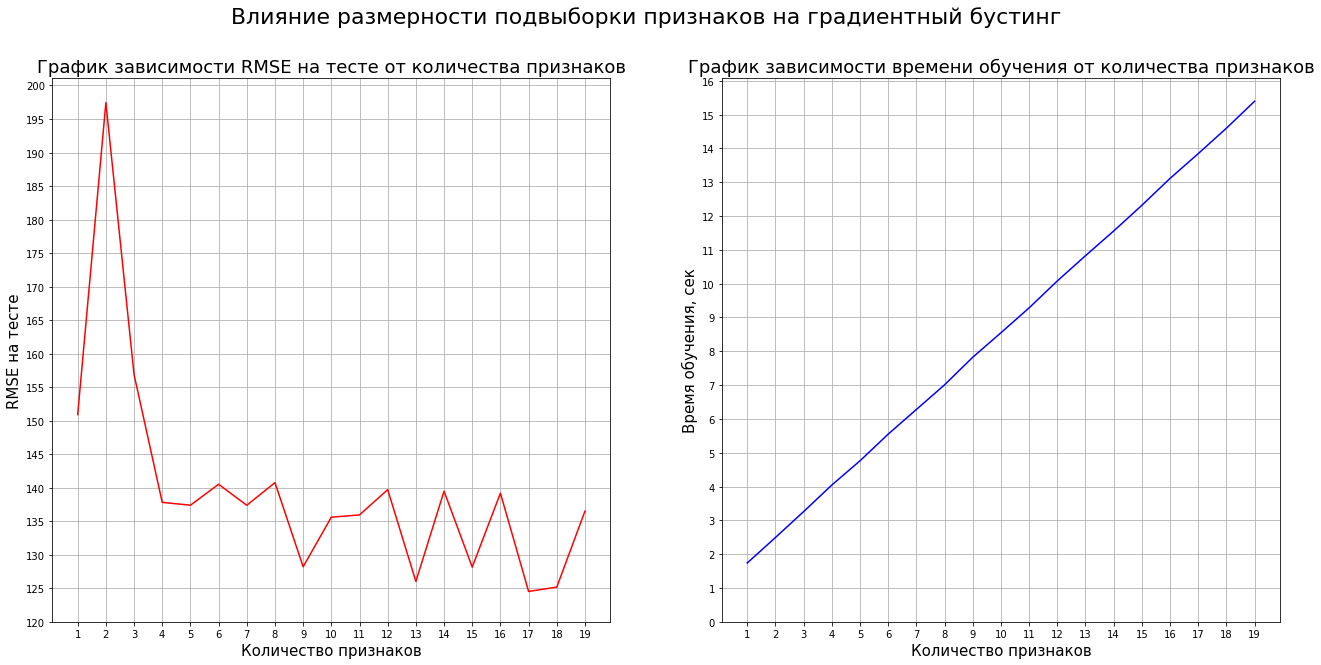

In [111]:
fig, axs = plt.subplots(1, 2, figsize=(22, 10))
plt.suptitle('Влияние размерности подвыборки признаков на градиентный бустинг', fontsize=22)
plt.subplot(121)
plt.plot(max_features, res_rmse_list, color='r')
plt.title('График зависимости RMSE на тесте от количества признаков', fontsize=18)
plt.xlabel('Количество признаков', fontsize=15)
plt.ylabel('RMSE на тесте', fontsize=15)
plt.xticks(np.arange(1, 20))
plt.yticks(np.arange(120, 205, 5))
plt.grid()
plt.subplot(122)
plt.plot(max_features, res_time_list, color='b')
plt.title('График зависимости времени обучения от количества признаков', fontsize=18)
plt.xlabel('Количество признаков', fontsize=15)
plt.ylabel('Время обучения, сек', fontsize=15)
plt.xticks(np.arange(1, 20))
plt.yticks(np.arange(0, 17, 1))
plt.grid()
fig.savefig('report/pictures/fig5.pdf', dpi=600)
plt.show()

In [112]:
max_depth_list = [x for x in range(1, 11)]
max_depth_list.append(None)
res_rmse_list = []
res_time_list = []
for md in max_depth_list:
    gbm = GradientBoostingMSE(n_estimators=450, learning_rate=0.1, max_depth=md, feature_subsample_size=12, 
                              min_samples_split=2, min_samples_leaf=1, max_leaf_nodes=None)
    res_time = %timeit -n1 -r1 -o gbm.fit(X_train, y_train)
    res_time_list.append(res_time.average)
    res_rmse_list.append(mse(y_test, gbm.predict(X_test), squared=False))

2.65 s ± 0 ns per loop (mean ± std. dev. of 1 run, 1 loop each)
4.52 s ± 0 ns per loop (mean ± std. dev. of 1 run, 1 loop each)
6.32 s ± 0 ns per loop (mean ± std. dev. of 1 run, 1 loop each)
8.19 s ± 0 ns per loop (mean ± std. dev. of 1 run, 1 loop each)
10.1 s ± 0 ns per loop (mean ± std. dev. of 1 run, 1 loop each)
11.9 s ± 0 ns per loop (mean ± std. dev. of 1 run, 1 loop each)
13.7 s ± 0 ns per loop (mean ± std. dev. of 1 run, 1 loop each)
15.5 s ± 0 ns per loop (mean ± std. dev. of 1 run, 1 loop each)
17.4 s ± 0 ns per loop (mean ± std. dev. of 1 run, 1 loop each)
19.2 s ± 0 ns per loop (mean ± std. dev. of 1 run, 1 loop each)
1.22 s ± 0 ns per loop (mean ± std. dev. of 1 run, 1 loop each)


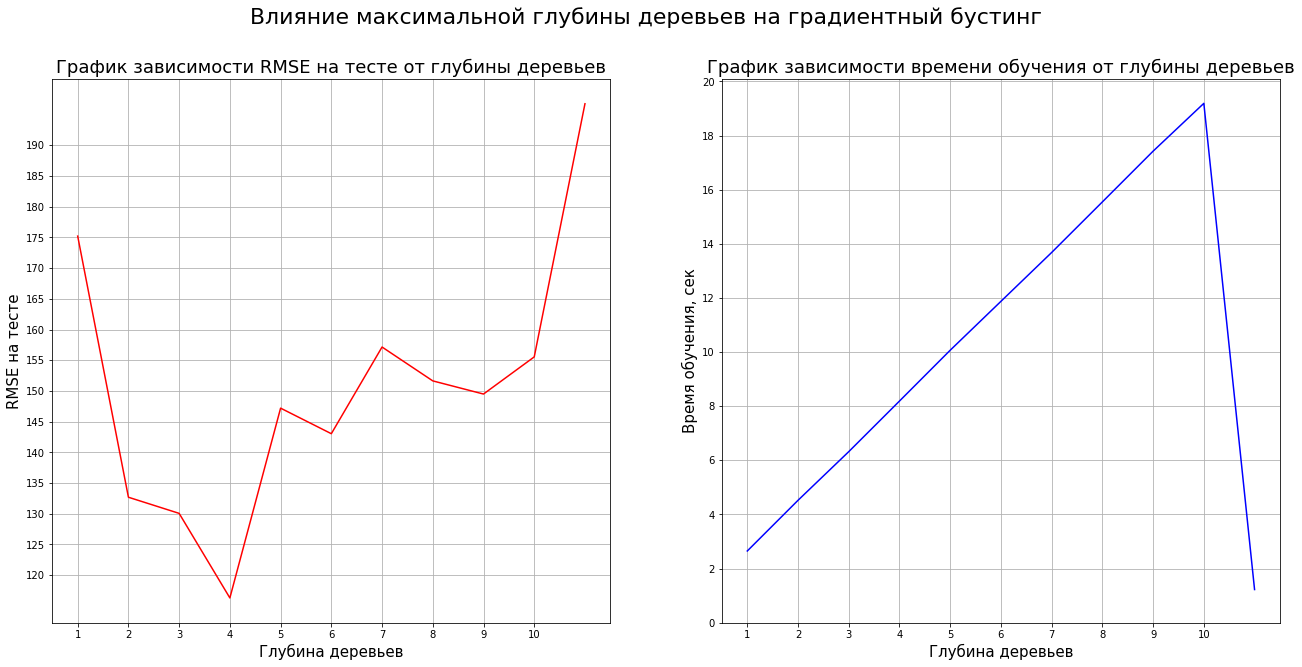

In [113]:
max_depth_list[-1] = 11
fig, axs = plt.subplots(1, 2, figsize=(22, 10))
plt.suptitle('Влияние максимальной глубины деревьев на градиентный бустинг', fontsize=22)
plt.subplot(121)
plt.plot(max_depth_list, res_rmse_list, color='r')
plt.title('График зависимости RMSE на тесте от глубины деревьев', fontsize=18)
plt.xlabel('Глубина деревьев', fontsize=15)
plt.ylabel('RMSE на тесте', fontsize=15)
plt.xticks(max_depth_list[0:-1])
plt.yticks(np.arange(120, 195, 5))
plt.grid()
plt.subplot(122)
plt.plot(max_depth_list, res_time_list, color='b')
plt.title('График зависимости времени обучения от глубины деревьев', fontsize=18)
plt.xlabel('Глубина деревьев', fontsize=15)
plt.ylabel('Время обучения, сек', fontsize=15)
plt.xticks(max_depth_list[0:-1])
plt.yticks(np.arange(0, 22, 2))
plt.grid()
fig.savefig('report/pictures/fig6.pdf', dpi=600)
plt.show()

In [116]:
learning_rate_list = np.geomspace(0.001, 1, 20)
res_rmse_list = []
res_time_list = []
for lr in learning_rate_list:
    gbm = GradientBoostingMSE(n_estimators=450, learning_rate=lr, max_depth=3, feature_subsample_size=12, 
                              min_samples_split=2, min_samples_leaf=1, max_leaf_nodes=None)
    res_time = %timeit -n1 -r1 -o gbm.fit(X_train, y_train)
    res_time_list.append(res_time.average)
    res_rmse_list.append(mse(y_test, gbm.predict(X_test), squared=False))

6.22 s ± 0 ns per loop (mean ± std. dev. of 1 run, 1 loop each)
6.31 s ± 0 ns per loop (mean ± std. dev. of 1 run, 1 loop each)
6.24 s ± 0 ns per loop (mean ± std. dev. of 1 run, 1 loop each)
6.26 s ± 0 ns per loop (mean ± std. dev. of 1 run, 1 loop each)
6.26 s ± 0 ns per loop (mean ± std. dev. of 1 run, 1 loop each)
6.29 s ± 0 ns per loop (mean ± std. dev. of 1 run, 1 loop each)
6.26 s ± 0 ns per loop (mean ± std. dev. of 1 run, 1 loop each)
6.32 s ± 0 ns per loop (mean ± std. dev. of 1 run, 1 loop each)
6.32 s ± 0 ns per loop (mean ± std. dev. of 1 run, 1 loop each)
6.36 s ± 0 ns per loop (mean ± std. dev. of 1 run, 1 loop each)
6.33 s ± 0 ns per loop (mean ± std. dev. of 1 run, 1 loop each)
6.37 s ± 0 ns per loop (mean ± std. dev. of 1 run, 1 loop each)
6.35 s ± 0 ns per loop (mean ± std. dev. of 1 run, 1 loop each)
6.38 s ± 0 ns per loop (mean ± std. dev. of 1 run, 1 loop each)
6.4 s ± 0 ns per loop (mean ± std. dev. of 1 run, 1 loop each)
6.39 s ± 0 ns per loop (mean ± std. dev. 

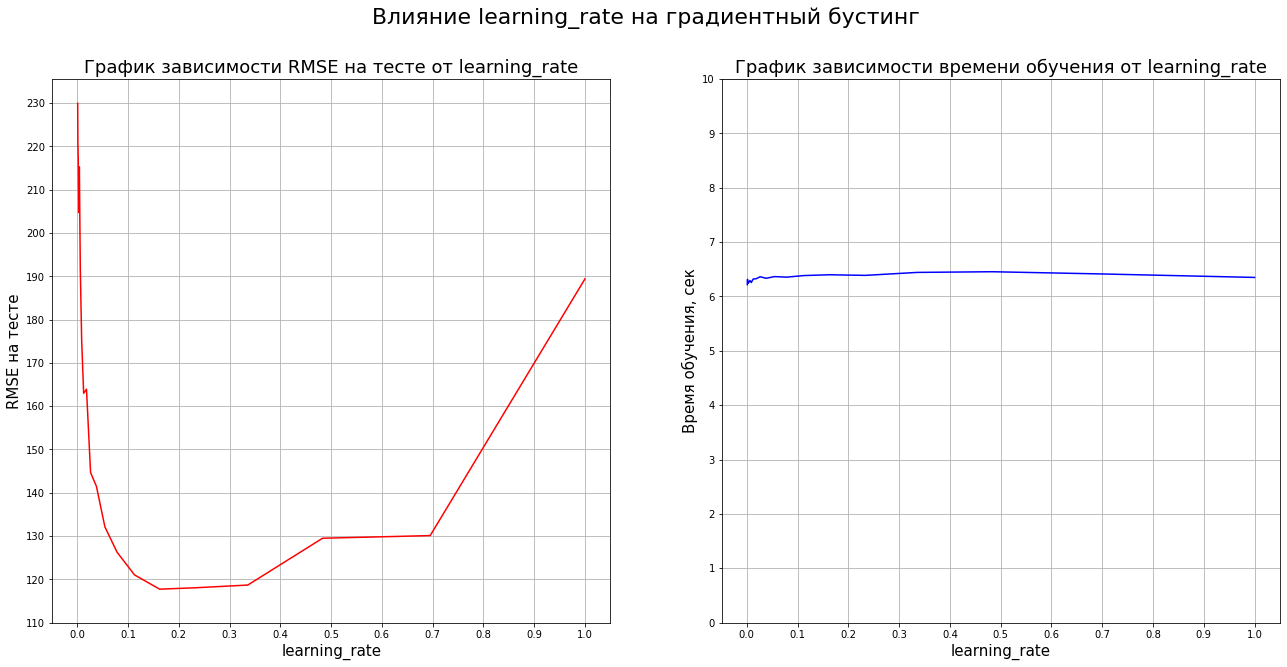

In [117]:
fig, axs = plt.subplots(1, 2, figsize=(22, 10))
plt.suptitle('Влияние learning_rate на градиентный бустинг', fontsize=22)
plt.subplot(121)
plt.plot(learning_rate_list, res_rmse_list, color='r')
plt.title('График зависимости RMSE на тесте от learning_rate', fontsize=18)
plt.xlabel('learning_rate', fontsize=15)
plt.ylabel('RMSE на тесте', fontsize=15)
plt.xticks(np.arange(0, 1.1, 0.1))
plt.yticks(np.arange(110, 240, 10))
plt.grid()
plt.subplot(122)
plt.plot(learning_rate_list, res_time_list, color='b')
plt.title('График зависимости времени обучения от learning_rate', fontsize=18)
plt.xlabel('learning_rate', fontsize=15)
plt.ylabel('Время обучения, сек', fontsize=15)
plt.xticks(np.arange(0, 1.1, 0.1))
plt.yticks(np.arange(0, 11, 1))
plt.grid()
fig.savefig('report/pictures/fig7.pdf', dpi=600)
plt.show()